# 6.2 Exploring relationships

### This script contains the following:
#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
        Correlations
        Scatterplots
        Pair Plots
        Categorical Plots

In [122]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib
from matplotlib import patches

In [123]:
# Create path
path = r"C:\Users\TN1\Desktop\career foundry\2 Data Immersion\6\DE vehicle price efficiency"

In [124]:
# Load your data from a CSV file
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'germany_auto_industry_dataset.csv'), index_col=False)


In [125]:
# Display all columns
pd.set_option('display.max_columns', None)

In [126]:
# Preview dataframe 
df.head()

,Brand,Model,Year,Mileage,Fuel Type,Fuel Consumption (L/100km),Horsepower (HP),Transmission,Price,City
0,Audi,Q7,2006,260886,Diesel,9.5,213,Automatic,12063.27,Cologne
1,Opel,Corsa,2015,72505,Hybrid,6.5,335,Automatic,33890.58,Berlin
2,Mercedes,C-Class,2007,125356,Electric,9.9,445,Automatic,92639.12,Berlin
3,Volkswagen,Polo,2009,130867,Electric,4.1,165,Automatic,88003.50,Munich
4,Opel,Astra,2022,57482,Electric,5.2,145,Manual,26028.97,Hamburg


In [127]:
print(df['City'].unique())


['Cologne' 'Berlin' 'Munich' 'Hamburg' 'Frankfurt']


In [128]:
# Check the dimensions of the dataframe
df.shape

(500, 10)

In [129]:
# Check the info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand                       500 non-null    object 
 1   Model                       500 non-null    object 
 2   Year                        500 non-null    int64  
 3   Mileage                     500 non-null    int64  
 4   Fuel Type                   500 non-null    object 
 5   Fuel Consumption (L/100km)  500 non-null    float64
 6   Horsepower (HP)             500 non-null    int64  
 7   Transmission                500 non-null    object 
 8   Price                       500 non-null    float64
 9   City                        500 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 39.2+ KB


In [130]:
def consistency_check(df):
    # Check for missing values
    print("Missing Values:\n", df.isnull().sum(), "\n")
    
    # Check for duplicates
    print("Duplicate Rows:", df.duplicated().sum(), "\n")
    
    # Check data types
    print("Data Types:\n", df.dtypes, "\n")
    
    # Check for unique values in object columns
    for col in df.select_dtypes(include='object').columns:
        print(f"Unique values in {col}: {df[col].unique()}\n")

# Example usage
consistency_check(df)

Missing Values:
 Brand                         0
Model                         0
Year                          0
Mileage                       0
Fuel Type                     0
Fuel Consumption (L/100km)    0
Horsepower (HP)               0
Transmission                  0
Price                         0
City                          0
dtype: int64 

Duplicate Rows: 0 

Data Types:
 Brand                          object
Model                          object
Year                            int64
Mileage                         int64
Fuel Type                      object
Fuel Consumption (L/100km)    float64
Horsepower (HP)                 int64
Transmission                   object
Price                         float64
City                           object
dtype: object 

Unique values in Brand: ['Audi' 'Opel' 'Mercedes' 'Volkswagen' 'BMW' 'Porsche']

Unique values in Model: ['Q7' 'Corsa' 'C-Class' 'Polo' 'Astra' 'Tiguan' 'X3' '5 Series' 'Panamera'
 '3 Series' 'E-Class' 'Passat' 'Golf' '

In [131]:
# View descriptive statistics 
df.describe()

,Year,Mileage,Fuel Consumption (L/100km),Horsepower (HP),Price
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2014.302000,158885.270000,7.630800,281.112000,51064.288940
std,5.504125,85604.122684,2.654805,121.169251,28652.646997
min,2005.000000,5667.000000,3.000000,70.000000,5209.730000
25%,2009.750000,85787.250000,5.300000,175.000000,24478.057500
50%,2014.000000,160433.500000,7.900000,279.500000,52892.525000
75%,2019.000000,234079.750000,10.000000,385.000000,75037.670000
max,2023.000000,299573.000000,12.000000,500.000000,99981.480000


In [132]:
# finding out why price is giving an error. it is because of a space that was given after the name
df.columns

Index(['Brand', 'Model', 'Year', 'Mileage', 'Fuel Type',
       'Fuel Consumption (L/100km)', 'Horsepower (HP)', 'Transmission',
       'Price ', 'City'],
      dtype='object')

In [133]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Verify that the space is removed
print(df.columns)


Index(['Brand', 'Model', 'Year', 'Mileage', 'Fuel Type',
       'Fuel Consumption (L/100km)', 'Horsepower (HP)', 'Transmission',
       'Price', 'City'],
      dtype='object')


In [134]:
print(df.dtypes)


Brand                          object
Model                          object
Year                            int64
Mileage                         int64
Fuel Type                      object
Fuel Consumption (L/100km)    float64
Horsepower (HP)                 int64
Transmission                   object
Price                         float64
City                           object
dtype: object


In [135]:
# Check for mixed data types in a column
columns_to_check = ['Brand', 'Model', 'Year', 'Mileage', 'Fuel Type', 'Fuel Consumption (L/100km)', 'Horsepower (HP)', 'Transmission', 'Price', 'City']

for col in columns_to_check:
    print(f"Mixed data types in column '{col}':")
    print(df[col].apply(type).value_counts())
    print("\n")

Mixed data types in column 'Brand':
Brand
<class 'str'>    500
Name: count, dtype: int64


Mixed data types in column 'Model':
Model
<class 'str'>    500
Name: count, dtype: int64


Mixed data types in column 'Year':
Year
<class 'int'>    500
Name: count, dtype: int64


Mixed data types in column 'Mileage':
Mileage
<class 'int'>    500
Name: count, dtype: int64


Mixed data types in column 'Fuel Type':
Fuel Type
<class 'str'>    500
Name: count, dtype: int64


Mixed data types in column 'Fuel Consumption (L/100km)':
Fuel Consumption (L/100km)
<class 'float'>    500
Name: count, dtype: int64


Mixed data types in column 'Horsepower (HP)':
Horsepower (HP)
<class 'int'>    500
Name: count, dtype: int64


Mixed data types in column 'Transmission':
Transmission
<class 'str'>    500
Name: count, dtype: int64


Mixed data types in column 'Price':
Price
<class 'float'>    500
Name: count, dtype: int64


Mixed data types in column 'City':
City
<class 'str'>    500
Name: count, dtype: int64




## Bar Charts of Categorisations

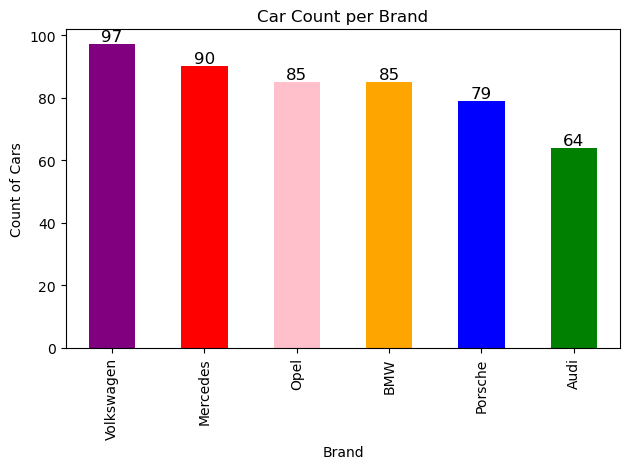

In [137]:
import matplotlib.pyplot as plt

# Plot the bar chart for car counts per brand
ax = df['Brand'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'blue', 'green'])

# Add title and labels
plt.title('Car Count per Brand')
plt.xlabel('Brand')
plt.ylabel('Count of Cars')  # Set the label for the y-axis

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',  # The height of the bar is the count value
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of the bar
        ha='center', va='bottom', fontsize=12, color='black'  # Center alignment and text styling
    )
# Save the bar chart to a file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'brandcounts_chart.png'))

# Show the plot
plt.tight_layout()
plt.show()


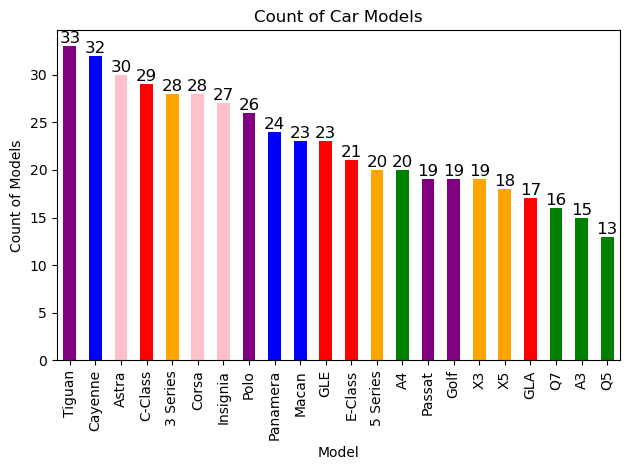

In [138]:
import matplotlib.pyplot as plt

# Define custom colors for specific brands
brand_colors = {
    'Volkswagen': 'purple',
    'Mercedes': 'red',
    'Opel': 'pink',
    'BMW': 'orange',
    'Porsche': 'blue',
    'Audi': 'green'
}

# Create the count of models plot
model_counts = df['Model'].value_counts()

# Map the colors based on the brand for each model
colors = []
for model in model_counts.index:
    brand = df[df['Model'] == model]['Brand'].iloc[0]  # Get the brand for the model
    colors.append(brand_colors.get(brand, 'gray'))  # Use gray if no match is found

# Plot the bar chart for the count of car models with the custom colors
ax = model_counts.plot.bar(color=colors)

# Add a title and labels to the axes
plt.title('Count of Car Models')
plt.xlabel('Model')
plt.ylabel('Count of Models')  # Add y-axis label for count of models

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',  # The height of the bar is the count value
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of the bar
        ha='center', va='bottom', fontsize=12, color='black'  # Center alignment and text styling
    )

# Show the plot
plt.tight_layout()
# Save the bar chart to a file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'modelcounts_chart.png'))
plt.show()


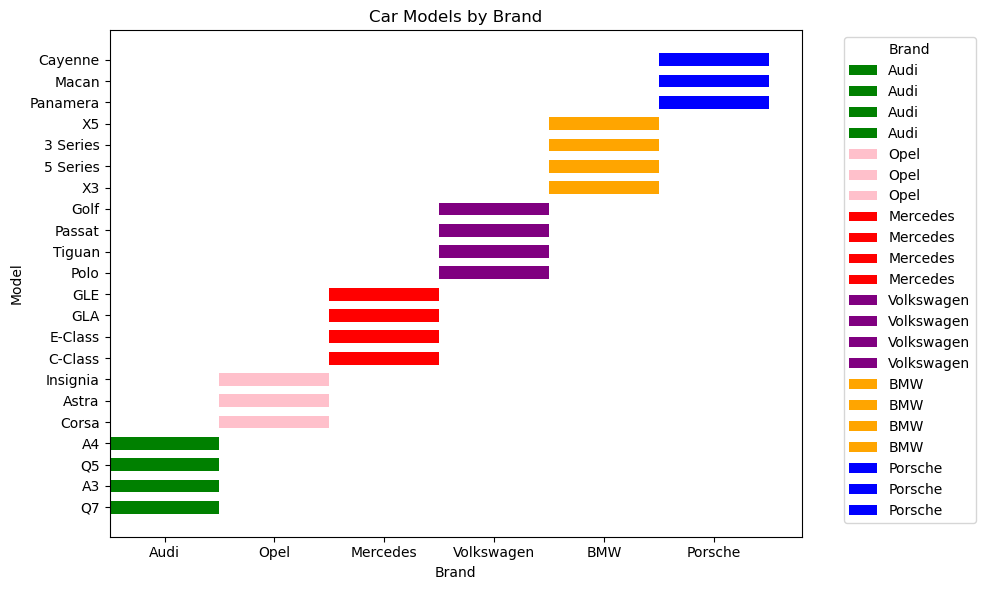

In [139]:
# Define custom colors for specific brands
brand_colors = {
    'Volkswagen': 'purple',
    'Mercedes': 'red',
    'Opel': 'pink',
    'BMW': 'orange',
    'Porsche': 'blue',
    'Audi': 'green'
}

# Create the figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Store the x positions for each brand
brand_positions = {}

# Loop through each unique brand to plot models
for idx, brand in enumerate(df['Brand'].unique()):
    brand_models = df[df['Brand'] == brand]['Model'].unique()
    
    # Plot a horizontal bar for each model with the brand-specific color
    for i, model in enumerate(brand_models):
        ax.barh(model, 1, left=idx, height=0.6, label=brand, color=brand_colors.get(brand, 'gray'))  # Horizontal bars
    
    # Store the brand position to later adjust the x-tick position
    brand_positions[brand] = idx

# Add titles and labels
plt.title('Car Models by Brand')
plt.xlabel('Brand')
plt.ylabel('Model')

# Set the x-ticks at the center of each brand section
center_positions = [pos + 0.5 for pos in list(brand_positions.values())]  # Add 0.5 to center the ticks
ax.set_xticks(center_positions)
ax.set_xticklabels(list(brand_positions.keys()), rotation=0)

# Add legend to the side
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
# Save the chart to a file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'brandmodel_chart.png'))
plt.show()

In [140]:
# Display unique fuel types
print(df["Fuel Type"].unique())


['Diesel' 'Hybrid' 'Electric' 'Petrol']


In [141]:
# Count the number of occurrences of each fuel type
print(df["Fuel Type"].value_counts())


Fuel Type
Petrol      135
Electric    129
Hybrid      123
Diesel      113
Name: count, dtype: int64


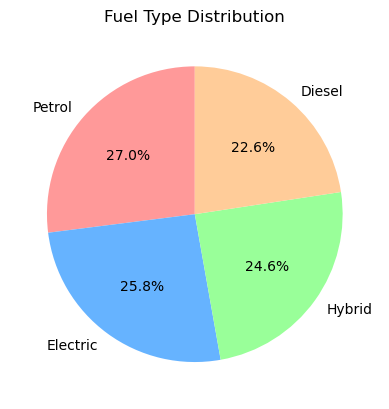

In [142]:
# 6.1.B Fuel Type Visualization Pie Chart
# Make a pie chart showing the Fuel Type
# Count the occurrences of each fuel type
Fuel_Type_counts = df['Fuel Type'].value_counts()

# Make a pie chart showing the Fuel Type
Fuel_Type_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
)

# Customize the chart
plt.ylabel('')  # Hide the y-label
plt.title('Fuel Type Distribution')
# Save the pie chart to a file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'FuelTypepie_chart.png'))
plt.show()

### 2. Exploring Relationships

### Correlations:

#### Excluding non-numeric columns before running the correlation

In [146]:
#Create a correlation matrix using pandas
#Select only the numerical columns from the DataFrame to avoid errors
numerical_columns = df.select_dtypes(include=['int', 'float'])

#The index ('rank') is one of the numerical columns, so we will drop it

if 'rank' in numerical_columns.columns:
    numerical_columns = numerical_columns.drop(columns=['rank'])

#Now, we create the correlation matrix with the appropriate data
numerical_columns.corr()

,Year,Mileage,Fuel Consumption (L/100km),Horsepower (HP),Price
Year,1.000000,0.019632,0.026723,-0.088323,-0.020700
Mileage,0.019632,1.000000,0.005601,-0.045952,-0.030475
Fuel Consumption (L/100km),0.026723,0.005601,1.000000,0.052225,-0.031064
Horsepower (HP),-0.088323,-0.045952,0.052225,1.000000,-0.019944
Price,-0.020700,-0.030475,-0.031064,-0.019944,1.000000


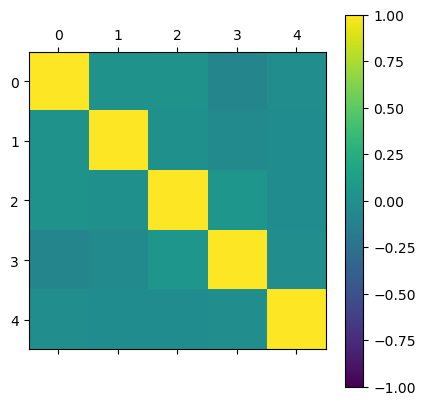

In [147]:
# Select only the numeric columns
numerical_columns = df.select_dtypes(include=['number'])

# Create a correlation heatmap using matplotlib
plt.matshow(numerical_columns.corr(), vmin=-1, vmax=1)
plt.colorbar()  # Optional: Adds a color bar for better visualization
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

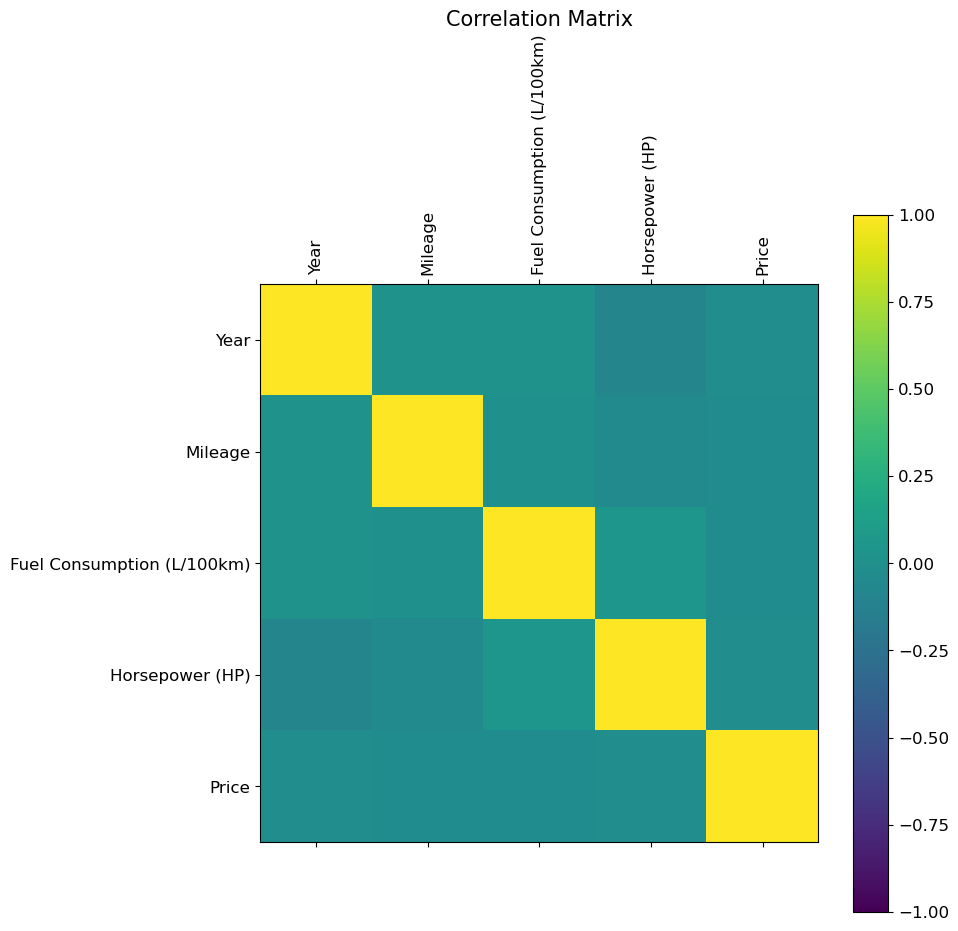

In [148]:
#Next, we add a legend, column labels, change the size of the heatmap and add a title
f=plt.figure(figsize=(9,9)) #This establishes the size of the heatmap
plt.matshow(numerical_columns.corr(), fignum=f.number, vmin=-1, vmax=1) #Defines the type of plot
plt.xticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12, rotation=90)
plt.yticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12) #No need for rotation in y-axis
cb=plt.colorbar() #add a color legend (optimizes itseld based on colors used in heatmap)
cb.ax.tick_params(labelsize=12) #add font size
plt.title('Correlation Matrix', fontsize=15) #Creates titles

### As in the legend, the darker the color of a square, the stronger the negative relationship between those two variables. Conversely, the lighter the color in the square, the stronger the positive relationship between the two variables.

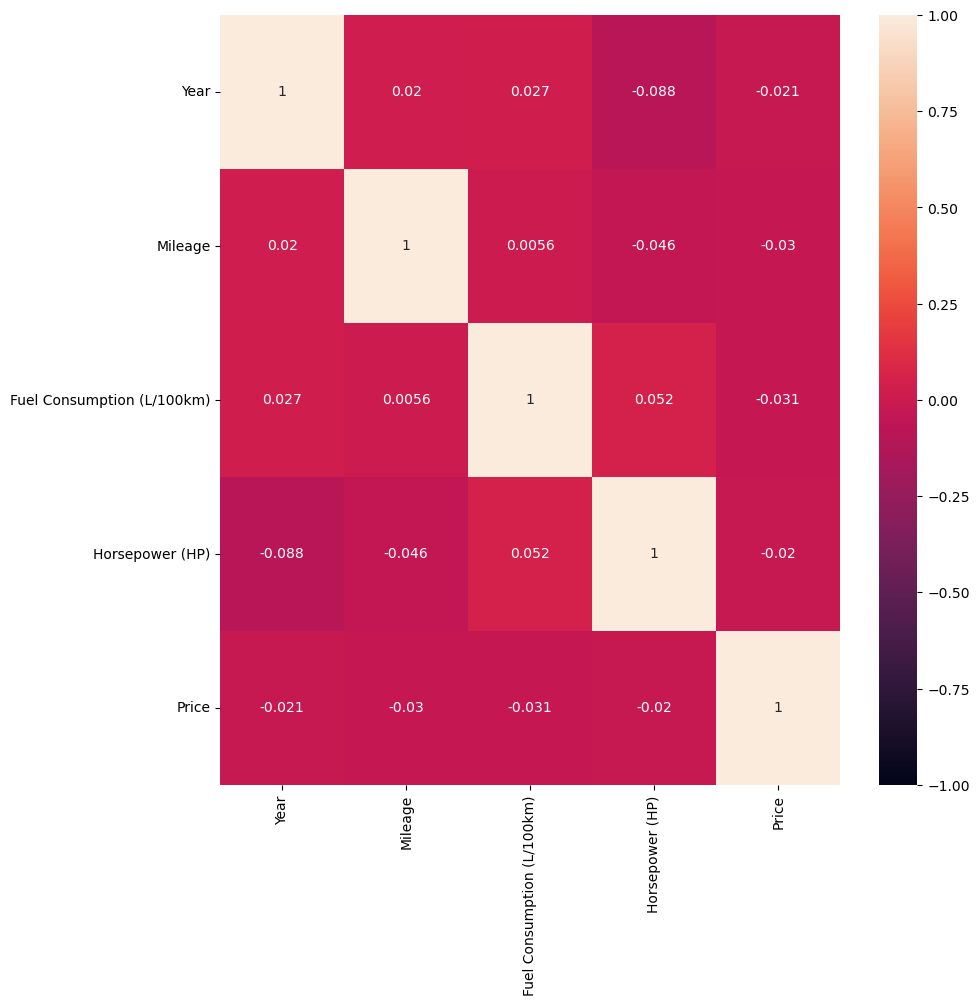

In [150]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(numerical_columns.corr(),vmin=-1, vmax=1, annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.


In [151]:
#export heatmap
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_DEautos.png'))

## Scatter Plots

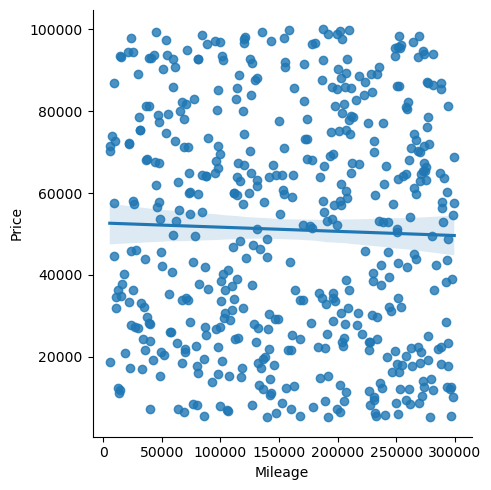

In [153]:
#Create a scatterplot for the "Mileage" and "Price" columns in seaborn

scat1=sns.lmplot(x = 'Mileage', y = 'Price', data = numerical_columns)

### As we can see, when mileage increases, the price slightly declines.

In [155]:
#export scatterplot
scat1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat1_DEautos.png'))

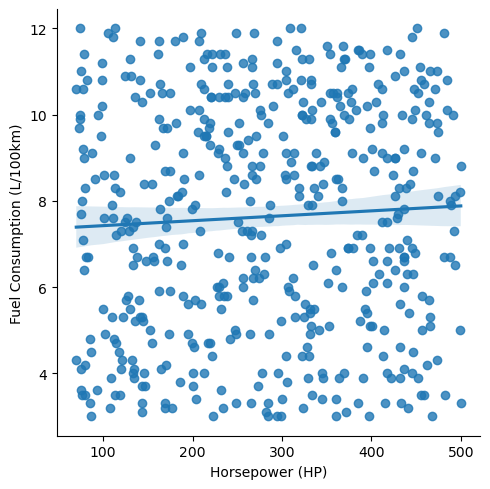

In [156]:
#Create a scatterplot for the "Fuel Consumption (L/100km)" and "Horsepower (HP)" columns in seaborn

scat2=sns.lmplot(x = 'Horsepower (HP)', y = 'Fuel Consumption (L/100km)', data = numerical_columns)

### As we can see, when horsepower increases, the fuel consumption also slightly increases.

In [158]:
#export scatterplot
scat2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat1_DEautos.png'))

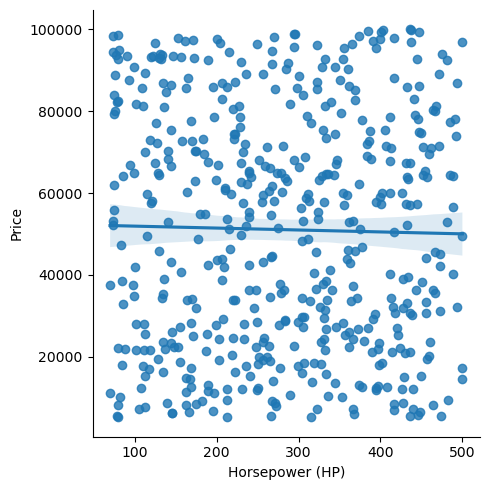

In [159]:
#Create a scatterplot for the "Price" and "Horsepower (HP)" columns in seaborn

scat3=sns.lmplot(x = 'Horsepower (HP)', y = 'Price', data = numerical_columns)

In [160]:
#export scatterplot
scat3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat1_DEautos.png'))

### As we can see from the plot, there is no meaningful correlation amount these parameters.

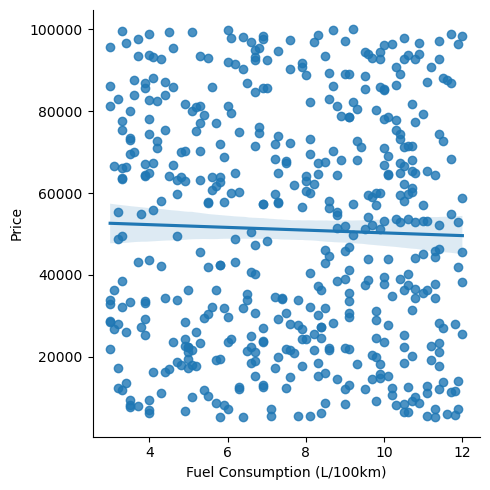

In [162]:
#Create a scatterplot for the "Fuel Consumption (L/100km)" and "Price" columns in seaborn

scat4=sns.lmplot(x = 'Fuel Consumption (L/100km)', y = 'Price', data = numerical_columns)

### As we can see, when fuel consumption increases, price declines.

In [164]:
#export scatterplot
scat4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat1_DEautos.png'))

## Pair Plots

In [166]:
#Creating a segmented df with the variables being used in the pair plot
sub_df=numerical_columns[['Year', 'Mileage', 'Fuel Consumption (L/100km)', 'Horsepower (HP)','Price', ]]

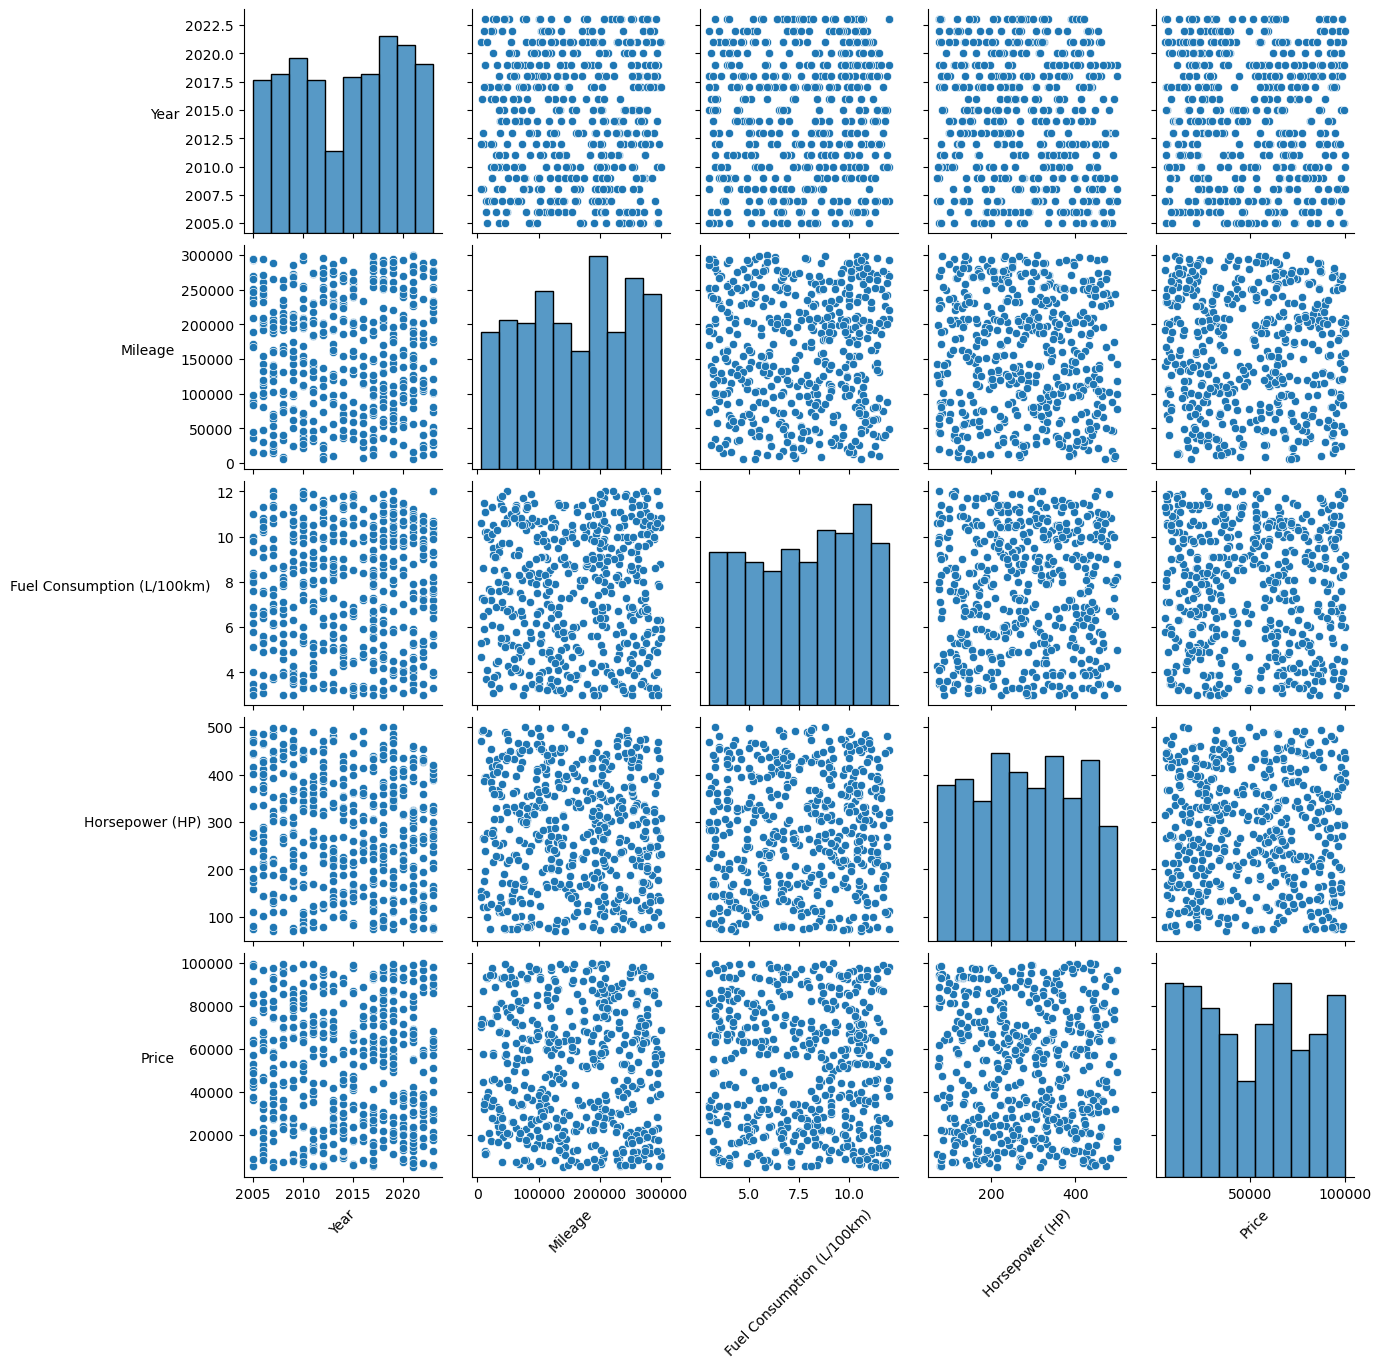

In [167]:
labels=['Year', 'Mileage', 'Fuel Consumption (L/100km)', 'Horsepower (HP)','Price']
x=sns.pairplot(sub_df)
for ax in x.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
    # Save the pairplot to a file (e.g., PNG, JPEG, etc.)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','pairplot.png'), bbox_inches='tight') 

# Show the plot
plt.show()

### Unfortunately, there are no sensible correlations among these parameters that we can produce some insights

## Categorical Plots

##### Creating a categorical variable that splits the "Brand" column into categories

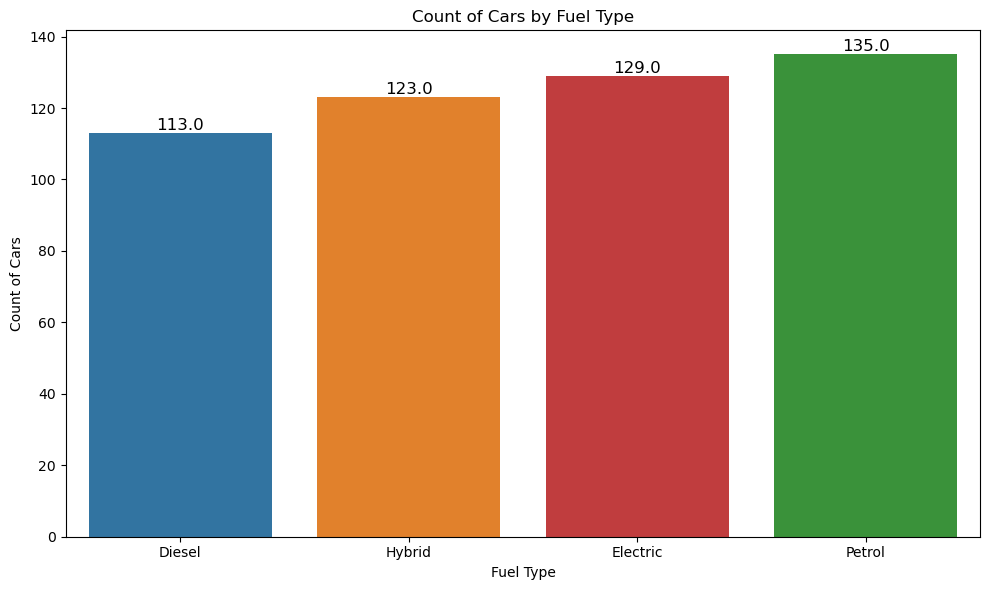

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette for each fuel type
fuel_colors = {
    'Diesel': '#1f77b4',    # Blue
    'Hybrid': '#ff7f0e',    # Orange
    'Petrol': '#2ca02c',    # Green
    'Electric': '#d62728'   # Red
}

# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='Fuel Type', 
    data=df, 
    hue='Fuel Type', 
    palette=fuel_colors, 
    dodge=False, 
    legend=False
)

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',    # The height of the bar is the count
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center top of the bar
        ha='center', va='bottom', fontsize=12, color='black'  # Center alignment
    )

# Customize the plot
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count of Cars')
plt.tight_layout()

# Save the bar chart to a file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Fueltypecountofcars.png'))

# Show the plot
plt.show()


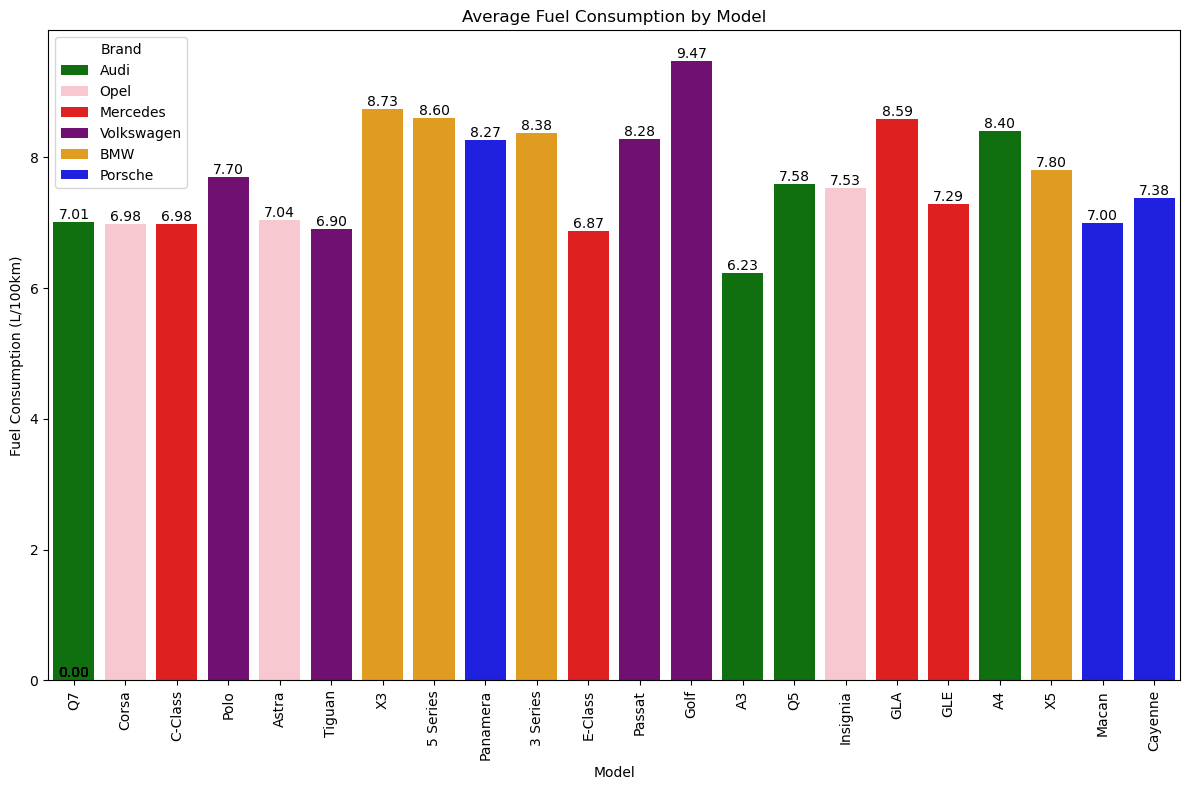

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
import os  # Import os module to handle paths

# Define custom colors for specific brands
brand_colors = {
    'Volkswagen': 'purple',
    'Mercedes': 'red',
    'Opel': 'pink',
    'BMW': 'orange',
    'Porsche': 'blue',
    'Audi': 'green'
}

# Create the bar plot without error bars
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Model', 
    y='Fuel Consumption (L/100km)', 
    data=df, 
    hue='Brand', 
    palette=brand_colors,
    errorbar=None  # Disable error bars (equivalent to ci=None)
)

# Add exact fuel consumption values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',   # Format to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center top of the bar
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Customize the plot
plt.title('Average Fuel Consumption by Model')
plt.xlabel('Model')
plt.ylabel('Fuel Consumption (L/100km)')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the bar chart to a file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Fuelconsumptionmodel.png'))

# Show the plot
plt.show()


### Commentation: Highest fuel consumption is belong to Volkswagen Golf. Whereas the least fuel consumption is belong to Audi A3

In [174]:
# Avarage fuel consumption
average_consumption = df.groupby('Fuel Type')['Fuel Consumption (L/100km)'].mean()

# Print or display the average consumption in a desired format (e.g., table)
print(average_consumption)

# You can also create a table or other visualization to present the averages

Fuel Type
Diesel      7.453982
Electric    7.584496
Hybrid      7.708943
Petrol      7.751852
Name: Fuel Consumption (L/100km), dtype: float64


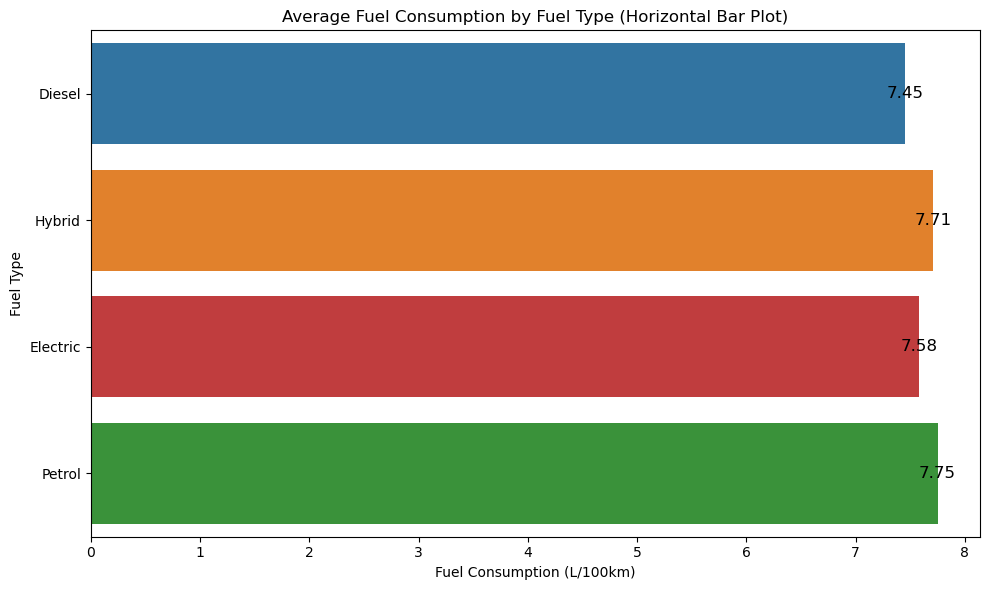

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the horizontal bar plot without confidence intervals (lines above bars)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Fuel Consumption (L/100km)', 
    y='Fuel Type', 
    data=df, 
    hue='Fuel Type',   # Group by fuel type for color mapping
    palette=fuel_colors,  # Custom color palette for fuel types
    errorbar=None  # Disable error bars (lines above bars)
)

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_width():.2f}',    # The width of the bar is the value (rounded to 2 decimals)
        (p.get_width(), p.get_y() + p.get_height() / 2.),  # Position at the end of the bar
        ha='center', va='center', fontsize=12, color='black'  # Center alignment
    )

# Plot title and adjustments
plt.title('Average Fuel Consumption by Fuel Type (Horizontal Bar Plot)')
plt.tight_layout()

# Save the bar chart to a file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Fueltypefuelconsumption.png'))

plt.show()


### The highest fuel consumption belongs to the cars run by petrol.

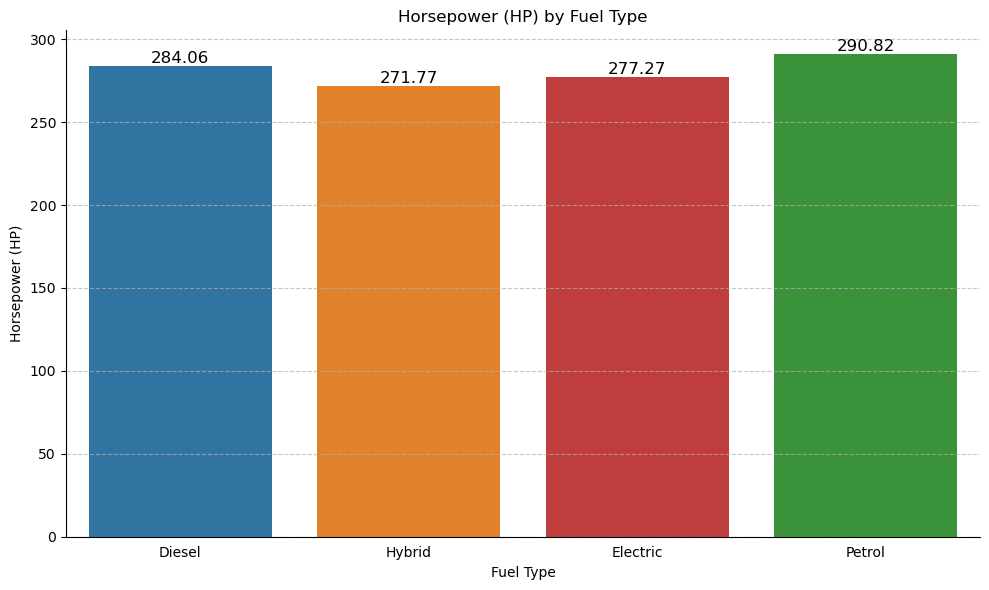

In [177]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette for each fuel type
fuel_colors = {
    'Diesel': '#1f77b4',    # Blue
    'Hybrid': '#ff7f0e',    # Orange
    'Petrol': '#2ca02c',    # Green
    'Electric': '#d62728'   # Red
}

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Fuel Type', 
    y='Horsepower (HP)', 
    data=df, 
    hue='Fuel Type',     # Assign the x variable to hue
    palette=fuel_colors, 
    dodge=False,         # Ensures the boxes don't separate (bars are combined by hue)
    legend=False,        # No legend needed as hue is same as x
    errorbar=None        # Remove the error bars (whiskers)
)

# Add exact horsepower values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',    # The height of the bar (value of HP) with 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center top of the bar
        ha='center', va='bottom', fontsize=12, color='black'  # Center alignment
    )

# Customize the plot
plt.title('Horsepower (HP) by Fuel Type')
plt.tight_layout()

# Remove vertical gridlines, x-axis ticks, and spines
ax.get_xaxis().set_ticks_position('none')  # This removes the x-axis ticks and lines
ax.spines['top'].set_visible(False)        # Remove the top spine
ax.spines['right'].set_visible(False)      # Remove the right spine
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Only horizontal lines will appear

# Save the bar chart to a file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Fueltypehorsepower.png'))

# Show the plot
plt.show()


### Running on petrol cars have the highest horsepower.

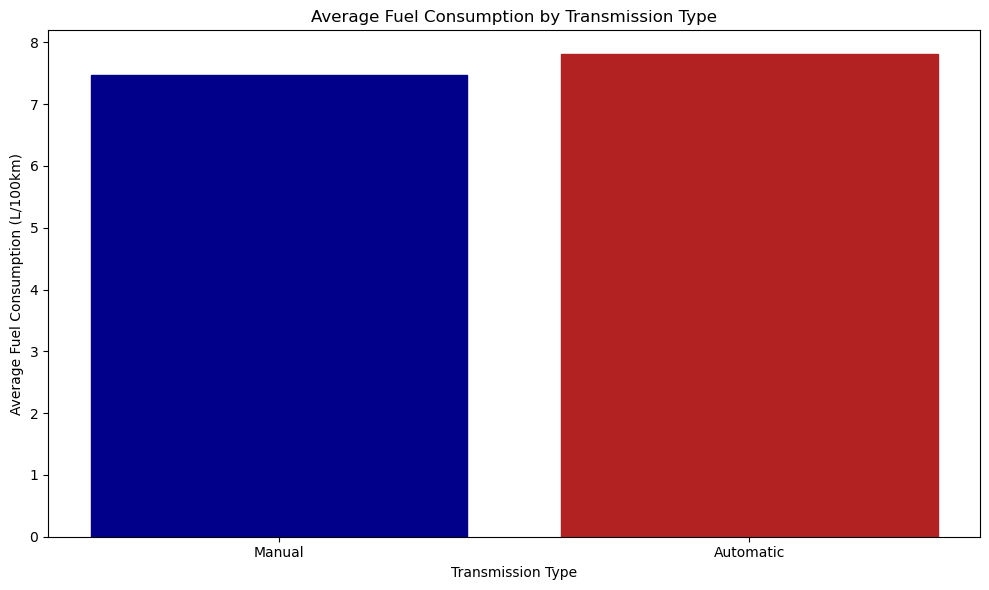

In [179]:
# Create a bar plot for 'Transmission' vs 'Fuel Consumption (L/100km)'
plt.figure(figsize=(10, 6))

# Calculate average fuel consumption per transmission type
avg_fuel_consumption = df.groupby('Transmission')['Fuel Consumption (L/100km)'].mean()

# Sort transmission types by average fuel consumption
sorted_transmissions = avg_fuel_consumption.sort_values()

# Create a color list with firebrick for the maximum fuel consumption and darkblue for others
colors = ['firebrick' if x == sorted_transmissions.max() else 'darkblue' for x in sorted_transmissions]

# Plot the barplot with manually specified colors for each bar
bars = plt.bar(sorted_transmissions.index, sorted_transmissions.values)

# Manually color the bars
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add title and labels
plt.title('Average Fuel Consumption by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Fuel Consumption (L/100km)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Adjust layout to avoid clipping
plt.tight_layout()

# Save the bar chart to a file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'TransmissionFuelconsump.png'))

# Show the plot
plt.show()


### Automatic transmissions have higher fuel consumptions.

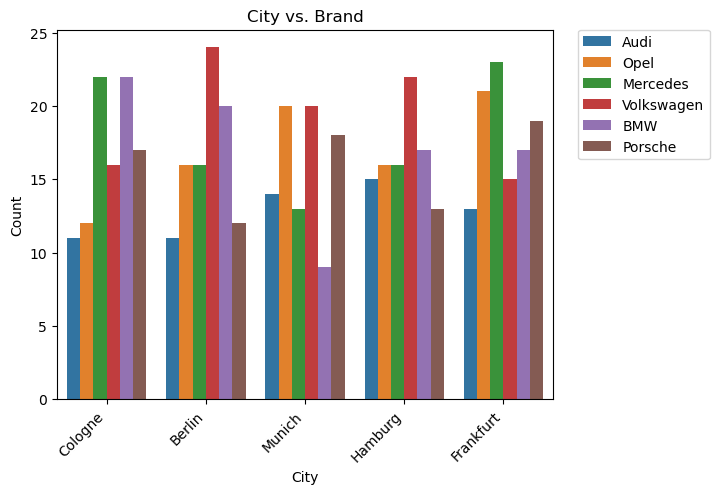

In [181]:
# Create a bar plot for 'Transmission' vs 'Fuel Consumption (L/100km)'
# Assuming your DataFrame is named 'df' and the columns are 'City' and 'Brand'
sns.countplot(x='City', hue='Brand', data=df)

# Customize the plot (optional)
plt.title('City vs. Brand')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Brand')
# Place legend outside the graph on the upper right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Check for missing brands and add them to the legend
brands_in_data = df['Brand'].unique()
brands_to_add = ['Porsche']  # Add any other missing brands here
for brand in brands_to_add:
    if brand not in brands_in_data:
        plt.plot([], [], color='gray', label=brand)
# Save the bar chart to a file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CityvsBrand.png'))

plt.show()

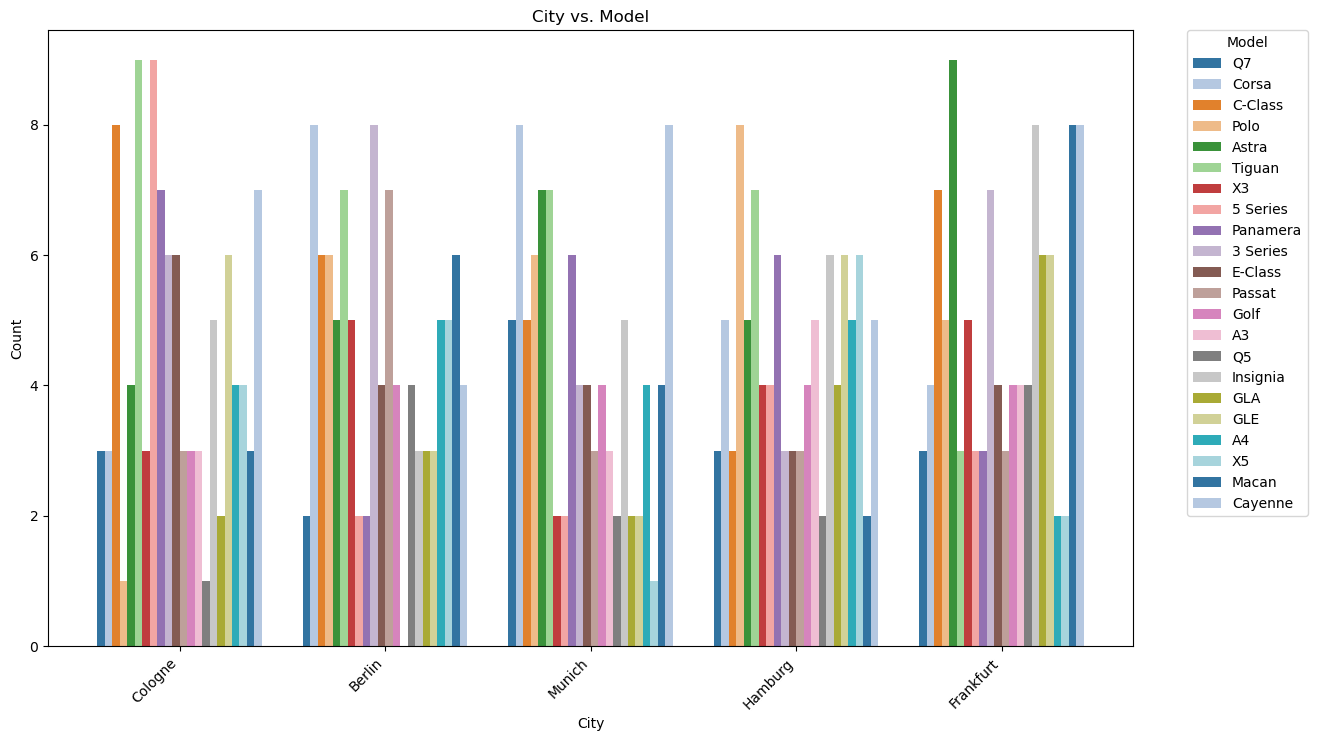

In [182]:
# Create a bar plot for 'City' vs 'Model'
plt.figure(figsize=(14, 8))

# Use a more distinguishable palette
sns.countplot(x='City', hue='Model', data=df, palette='tab20')

# Customize the plot
plt.title('City vs. Model')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Place legend outside the graph on the upper right
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Check for missing brands and add them to the legend
brands_in_data = df['Model'].unique()
brands_to_add = ['Porsche']  # Add any other missing brands here
for brand in brands_to_add:
    if brand not in brands_in_data:
        plt.plot([], [], color='gray', label=brand)
# Save the bar chart to a file (e.g., PNG)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CityvsModel.png'))

# Show the plot
plt.show()



### Hypothesis: Hybrid German cars do not have less fuel consumption than German diesel cars.

In [184]:
# Define the path where you want to save the file
path = r'C:\Users\TN1\Desktop\career foundry\2 Data Immersion\6\DE vehicle price efficiency'

# Define the full directory path where you want to save the file
save_directory = os.path.join(path, '02 Data', 'Prepared Data')

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Define the full path for the file
file_path = os.path.join(save_directory, 'DEauto_wrangled.csv')

# Export data to pkl
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'DEautos_wrangled2.pkl'))

In [185]:
# Export data to cvs
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'DEautos_wrangled.csv'))
